Data Resource : 
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)
df = pd.read_csv('/content/gdrive/My Drive/house_train.csv')
df

# Exploratory Data Analysis

*   LotFrontage = jalan yang terkoneksi ke properti
*   Alley = gang, lorong


*   BsmtQual = tinggi bangunan
*   BsmtCond = kondisi bangunan secara keseluruhan


*   BsmtExposure = tempat jalan-jalan
*   BsmtFinType1 = kualitas bangunan di area yang sudah jadi


*   BsmtFinType2 = kualitas bangunan di area yang sudah jadi kedua (kalau ada)
*   Electrical = sistem kelistrikan


*   Fireplace quality = kualitas perapian
*   GarageType = lokasi garasi

*   GarageYrBlt = tahun garasi dibuat
*   GarageFinish = interior garasi yang sudah jadi


*   GarageQual = kualitas garasi
*   GarageCond = kondisi garasi



*   PoolQC = kualitas kolam renang
*   Fence = kualitas pagar


*   MiscFeature = fitur lain"nya yang tidak terdapat


*   MasVnrType = penempelan tipe batu
*   MasVnrArea = luasnya penempelan batu

















### Percentage of Null Values

In [ ]:
round(df.isnull().sum() / df.shape[0] * 100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

# Feature Engineering

#### Handle Too Many Column with Null Value Replaced with Mean (Grouped By) or Mode Value

In [ ]:
limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)

In [ ]:
df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('LotShape')['LotFrontage'].transform('mean'))

<ipython-input-155-e4aef4b4e4fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('LotShape')['LotFrontage'].transform('mean'))


In [ ]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df.groupby('GrLivArea')['MasVnrArea'].transform('mean'))

<ipython-input-156-57485cedda4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MasVnrArea'] = df['MasVnrArea'].fillna(df.groupby('GrLivArea')['MasVnrArea'].transform('mean'))


In [ ]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<ipython-input-157-0ab23a77b6f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])


In [ ]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

<ipython-input-158-84a5763c4c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df.groupby('BsmtFinSF2')['BsmtFinType2'].transform(f))

<ipython-input-159-93782dee765e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df.groupby('BsmtFinSF2')['BsmtFinType2'].transform(f))


In [ ]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

<ipython-input-160-a6b3ad248826>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df.groupby('BsmtFinSF1')['BsmtFinType1'].transform(f))

<ipython-input-161-fedff8450cfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df.groupby('BsmtFinSF1')['BsmtFinType1'].transform(f))


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['GarageType'] = df['GarageType'].fillna(df.groupby('TotalBsmtSF')['GarageType'].transform(f))

<ipython-input-162-94d0e09f5b8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageType'] = df['GarageType'].fillna(df.groupby('TotalBsmtSF')['GarageType'].transform(f))


In [ ]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

<ipython-input-163-d79390826348>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['GarageQual'] = df['GarageQual'].fillna(df.groupby('GarageType')['GarageQual'].transform(f))

<ipython-input-164-fffea92ee94b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageQual'] = df['GarageQual'].fillna(df.groupby('GarageType')['GarageQual'].transform(f))


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['GarageQual'] = df['GarageQual'].fillna(df.groupby('GarageType')['GarageQual'].transform(f))

<ipython-input-165-fffea92ee94b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageQual'] = df['GarageQual'].fillna(df.groupby('GarageType')['GarageQual'].transform(f))


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['GarageCond'] = df['GarageCond'].fillna(df.groupby('GarageQual')['GarageCond'].transform(f))

<ipython-input-166-51f342cc3bc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageCond'] = df['GarageCond'].fillna(df.groupby('GarageQual')['GarageCond'].transform(f))


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['GarageFinish'] = df['GarageFinish'].fillna(df.groupby('GarageCond')['GarageFinish'].transform(f))

<ipython-input-167-df2135a12e26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageFinish'] = df['GarageFinish'].fillna(df.groupby('GarageCond')['GarageFinish'].transform(f))


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df.groupby('GarageFinish')['GarageYrBlt'].transform(f))

<ipython-input-168-d5dee0ade3fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df.groupby('GarageFinish')['GarageYrBlt'].transform(f))


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['MasVnrType'] = df['MasVnrType'].fillna(df.groupby('MasVnrArea')['MasVnrType'].transform(f))

<ipython-input-169-910681404008>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MasVnrType'] = df['MasVnrType'].fillna(df.groupby('MasVnrArea')['MasVnrType'].transform(f))


In [ ]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

<ipython-input-170-e97c8e99dad9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['BsmtExposure'] = df['BsmtExposure'].fillna(df.groupby('BldgType')['BsmtExposure'].transform(f))

<ipython-input-171-572a793cebde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtExposure'] = df['BsmtExposure'].fillna(df.groupby('BldgType')['BsmtExposure'].transform(f))


In [ ]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<ipython-input-172-d50bd20befdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['BsmtCond'] = df['BsmtCond'].fillna(df.groupby('YearBuilt')['BsmtCond'].transform(f))

<ipython-input-173-13da465534a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtCond'] = df['BsmtCond'].fillna(df.groupby('YearBuilt')['BsmtCond'].transform(f))


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['BsmtQual'] = df['BsmtQual'].fillna(df.groupby('YearBuilt')['BsmtQual'].transform(f))

<ipython-input-174-2f9fa98aa10d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtQual'] = df['BsmtQual'].fillna(df.groupby('YearBuilt')['BsmtQual'].transform(f))


In [ ]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else next(iter(x.mode()), np.nan)
df['FireplaceQu'] = df['FireplaceQu'].fillna(df.groupby('YearBuilt')['FireplaceQu'].transform(f))

<ipython-input-175-01d7f3b0ad2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FireplaceQu'] = df['FireplaceQu'].fillna(df.groupby('YearBuilt')['FireplaceQu'].transform(f))


In [ ]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

<ipython-input-176-8475ab045b47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])


In [ ]:
df.shape

(1460, 77)

In [ ]:
x = df.drop(['Id'], axis=1)

### Visualizing Current Data

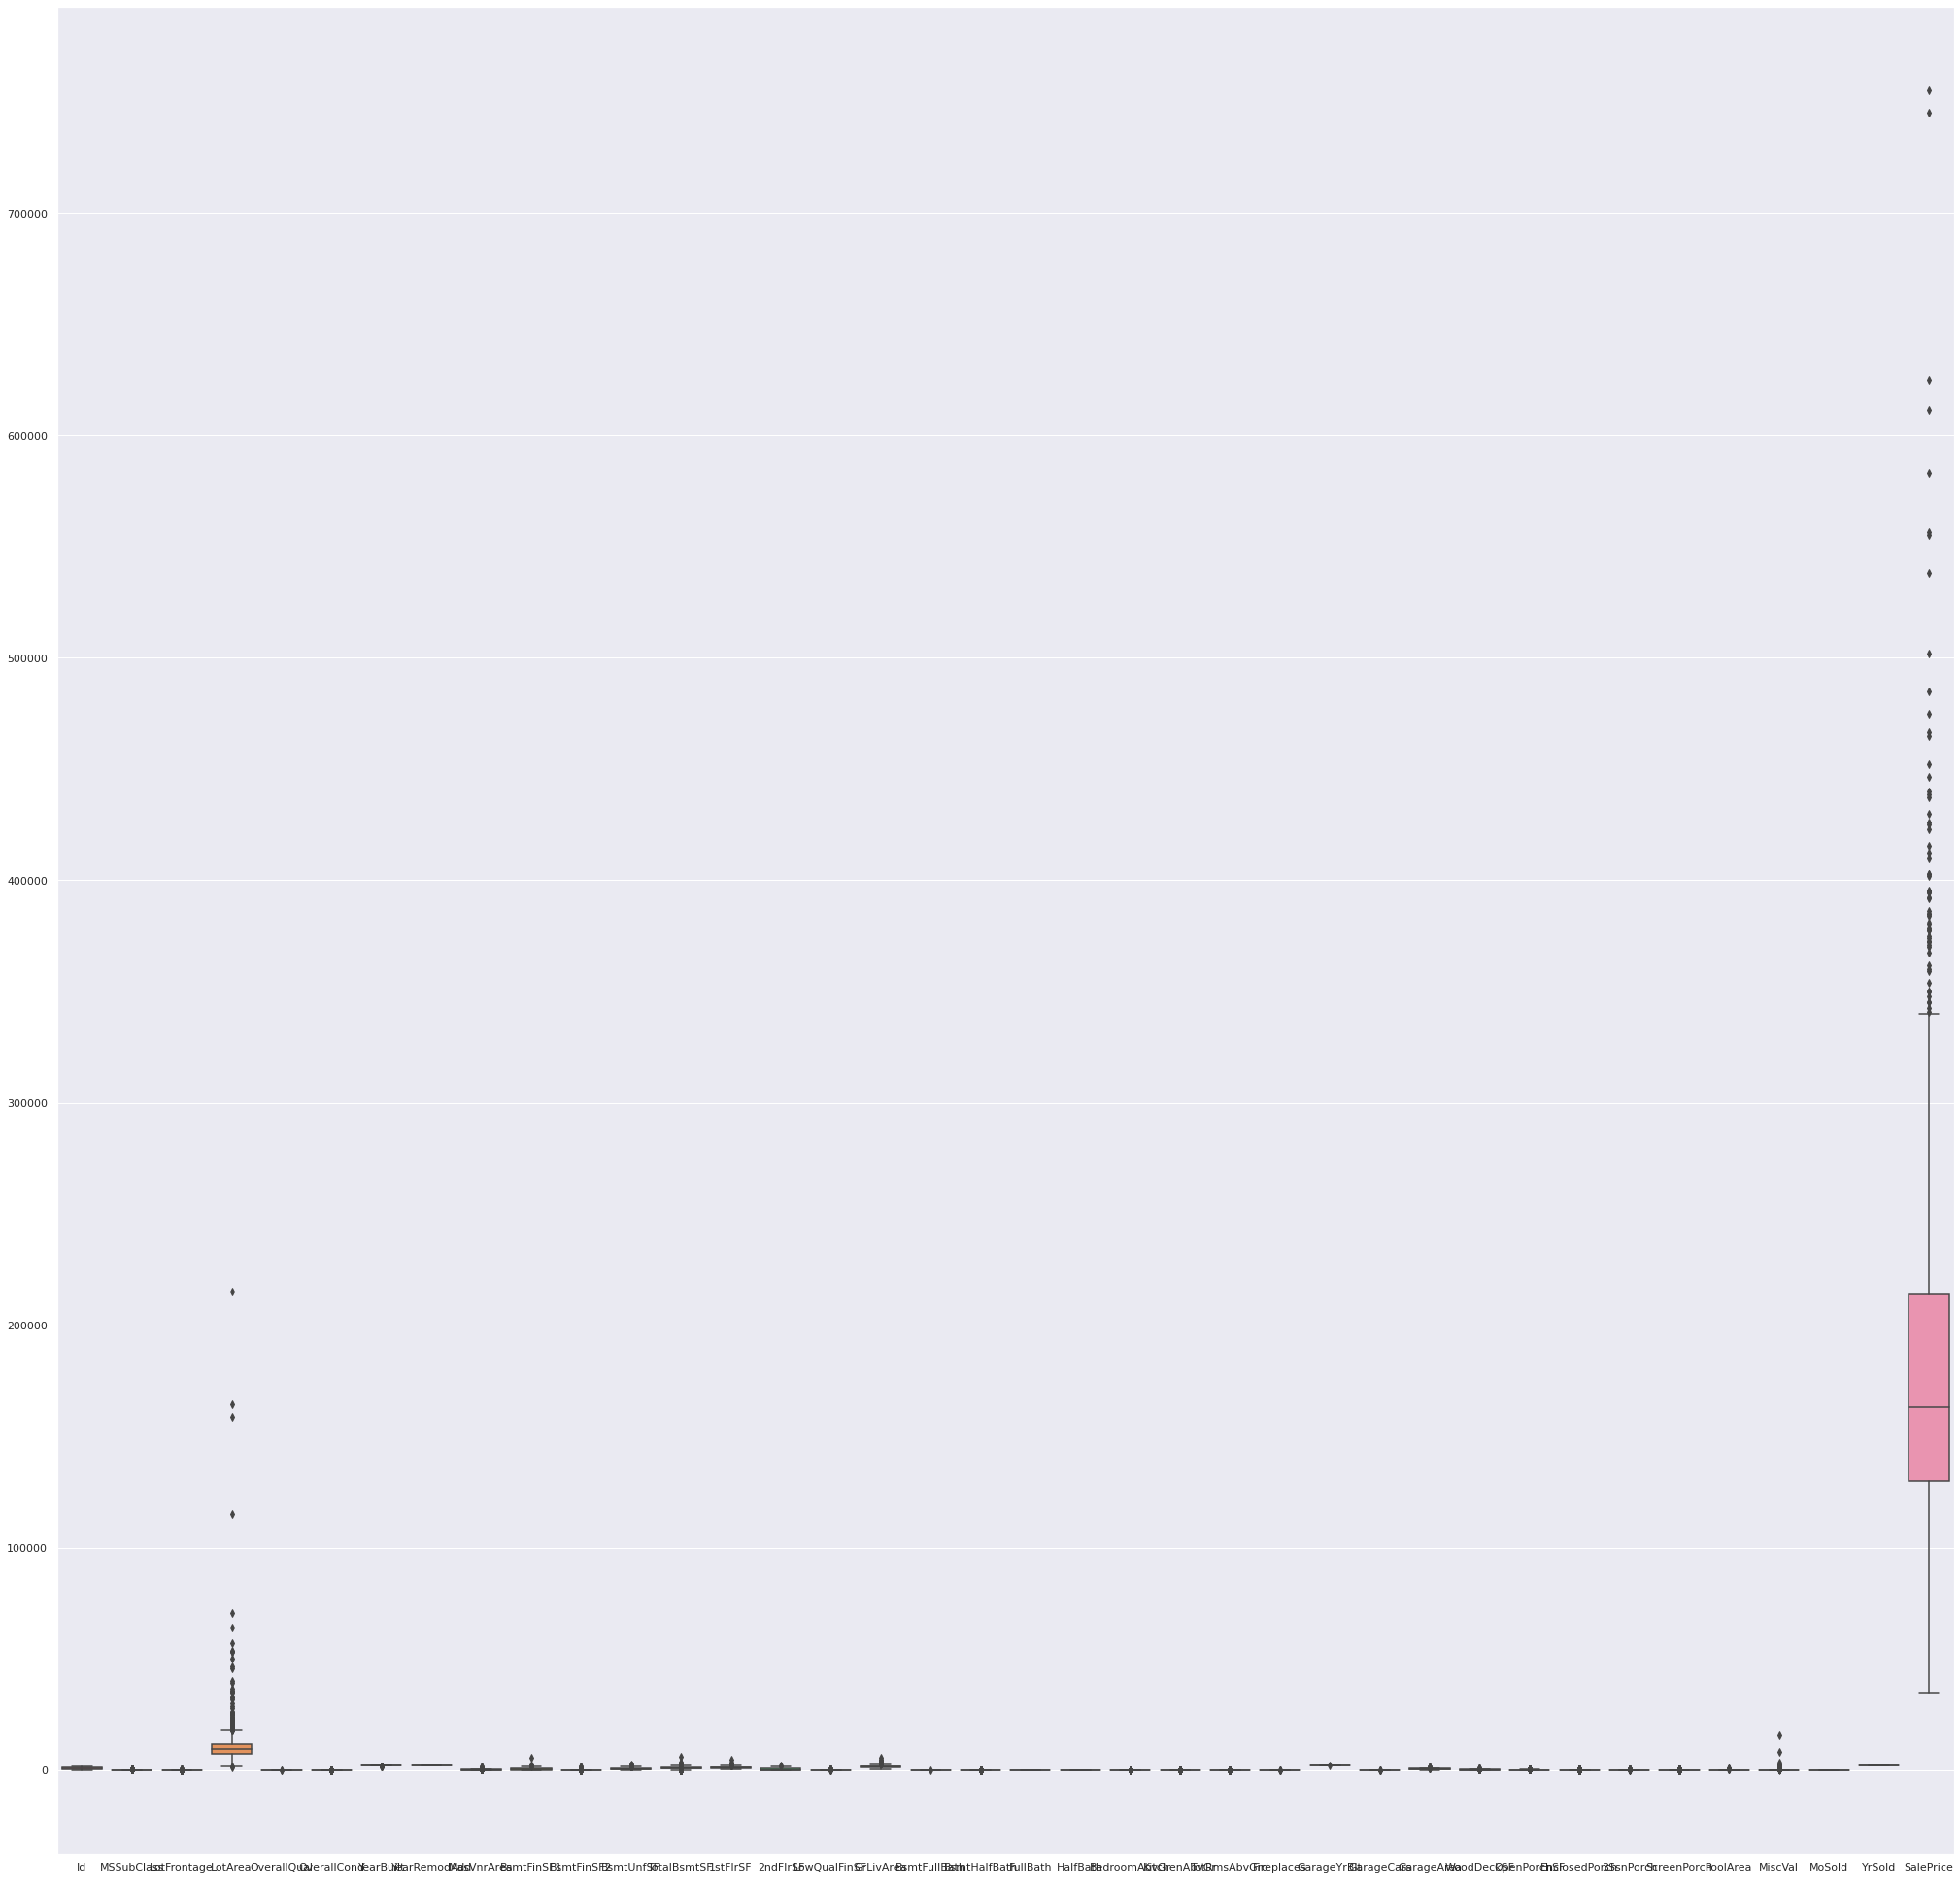

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(35,35)})
sns.boxplot(data=df,orient='v')

### Cleaning Outliers Data

In [ ]:
q_low = df["LotArea"].quantile(0.01)
q_hi  = df["LotArea"].quantile(0.99)
df = df[(df["LotArea"] < q_hi) & (df["LotArea"] > q_low)]

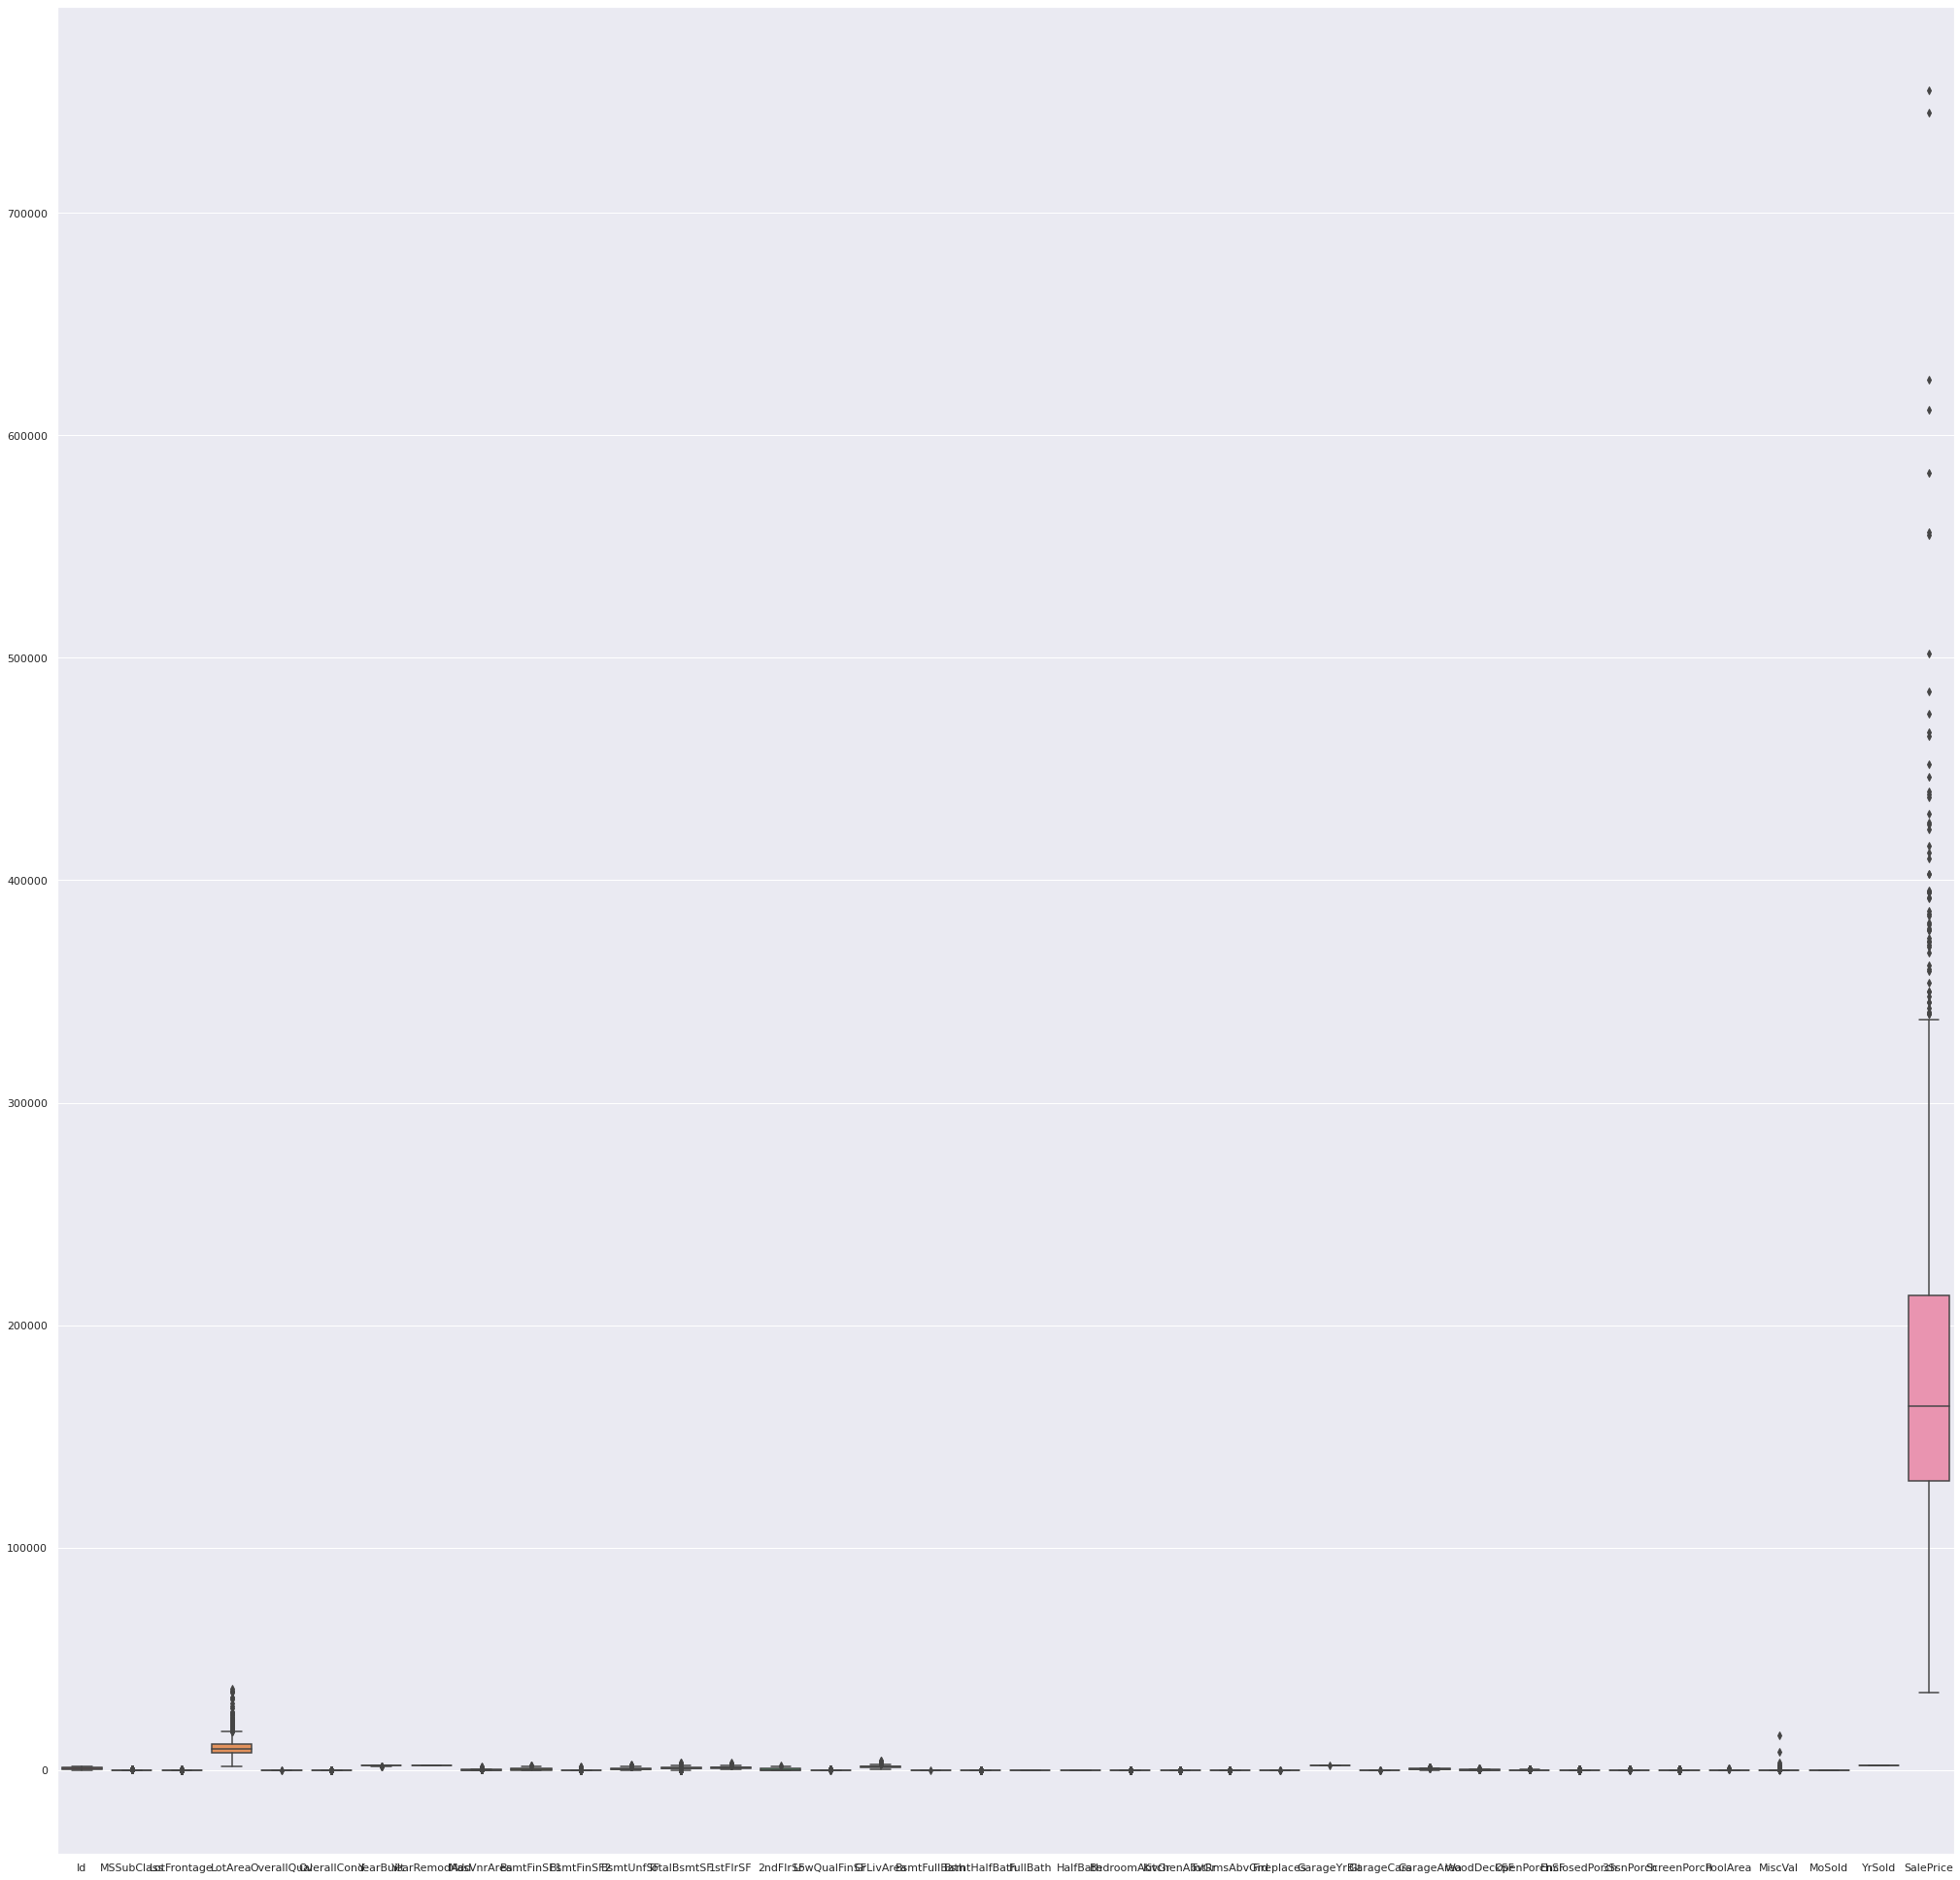

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(35,35)})
sns.boxplot(data=df,orient='v')

### Selecting Dependent and Independent Variable

In [ ]:
df = df.drop(['Id'], axis=1)

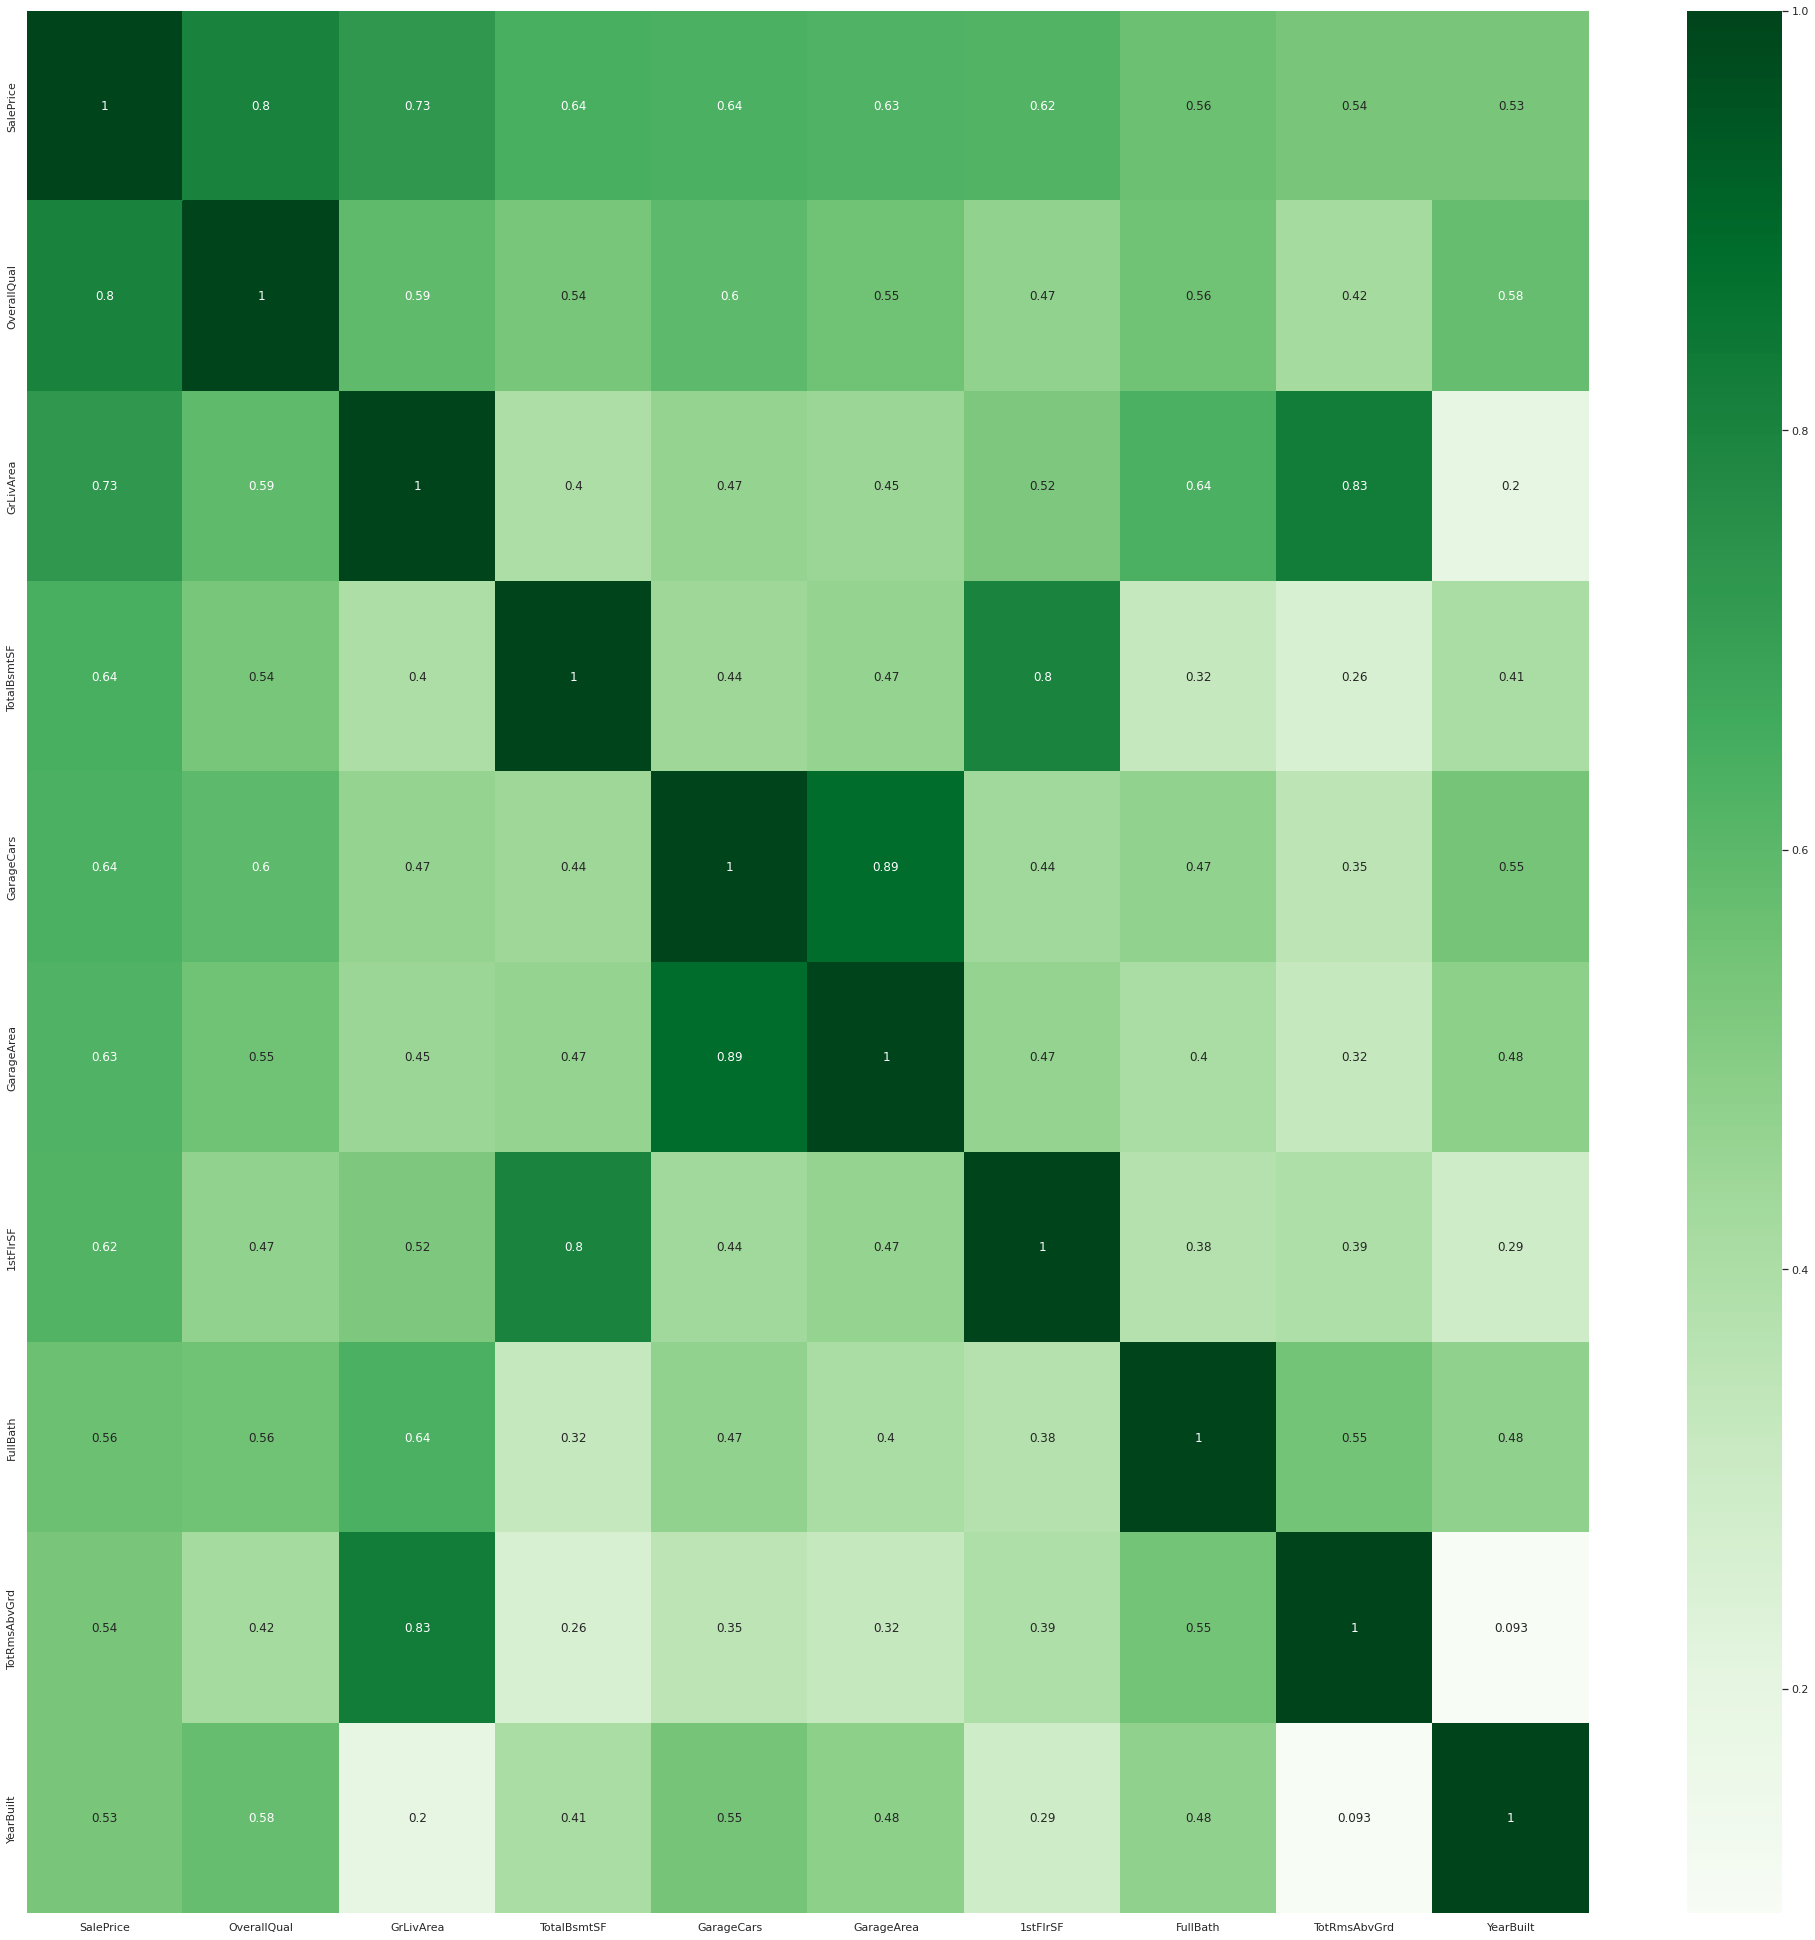

In [ ]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes
corr = numeric_features.corr()

k = 10
cols = corr.nlargest(k , 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm , cmap = "Greens",cbar = True,
                 yticklabels = cols.values, xticklabels = cols.values, annot=True)

In [ ]:
y = df['SalePrice']
x = df[['OverallQual','GrLivArea']]

### Label encoding of categorical data - Only If required

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
categorical_cols = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'] 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# apply le on categorical feature columns
x[categorical_cols] = x[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False) 

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(x[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=x.index)
data_hot_encoded.columns = ohe.get_feature_names_out()

#Extract only the columns that didnt need to be encoded
data_other_cols = x.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
df = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [ ]:
df

Output hidden; open in https://colab.research.google.com to view.

### Splitting data and train set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

1142
286
1142
286


# Machine Learning Models

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

# Accuracy of Linear Regression Model

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.7331742179437959